### Pre-processing

#### In the code below I've imported the original file in python evnviroment as a dataframe.
#### I've decided to remove childid, childfirstname and childlastname, merging together the columns in two new column:

#### - full-name: childfirstname + childlastname, in order to obtain the full name of the child, this is usefull if we want to do some queries for a specific case.

#### - identifier: childid + childfirstname + childlastname, this in order to create a unique identifier, it might be usefull for the newtork, in order to create nodes and prevent also homonymy. 

In [14]:
original_df = pd.read_csv("dataset/original-file.csv", encoding='latin-1')
original_df

,childid,childfirstname,childlastname,birthdate,sex,race,haircolor,eyecolor,height (inches),weight (lbs),missingreporteddate,missingfromdate,missingfromcity,missingfromstate,missingfromcountry,ncmeccasenumber,casetype,postercontact,posterurl
0,1,Christopher,Abeyta,11/28/85 0:00,Male,White,Blonde,Blue,26,17,7/16/86 0:00,7/15/86 0:00,Colorado Springs,CO,United States,600552,Lost Injured Missing,Colorado Springs Police Department (Colorado) ...,www.missingkids.org/poster/NCMC/600552/1/
1,4,Aaron,Anderson,6/23/87 0:00,Male,White,Lt. Brown,Brown,28,32,5/23/89 16:57,4/7/89 0:00,Pine City,MN,United States,723921,Non Family Abduction,Pine County Sheriff's Department (Minnesota),www.missingkids.org/poster/NCMC/723921/1/
2,15,Taranika,Raymond,7/6/82 0:00,Female,Black,Black,Brown,63,165,2/29/96 11:07,11/13/95 0:00,New Orleans,LA,United States,815318,Endangered Runaway,New Orleans Police Department (Louisiana)1-504...,www.missingkids.org/poster/NCMC/815318/1/
3,18,Ruben,Felix,10/18/94 0:00,Male,Hispanic,Sandy,Blue,30,32,3/14/97 17:58,2/23/97 0:00,Shoshone,ID,United States,830148,Lost Injured Missing,Lincoln County Sheriff's Office (Idaho) - Mis...,www.missingkids.org/poster/NCMC/830148/1/
4,29,Tiffany,Dixon,7/18/79 0:00,Female,Hispanic,Black,Brown,62,105,10/25/91 12:36,10/10/91 0:00,Brooklyn,NY,United States,760721,Lost Injured Missing,New York City Police Department (New York) - M...,www.missingkids.org/poster/NCMC/760721/1/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,592262,Alexius,Boyd,2/5/00 0:00,Female,White,NaN,NaN,61,105,3/3/17 22:25,3/3/17 1:30,Norfolk,NE,United States,1290383,Endangered Runaway,Norfolk Police Department (Nebraska) 1-402-644...,www.missingkids.org/poster/NCMC/1290383/1/
2830,592293,Gage,Harkins,3/1/00 0:00,Male,White,NaN,NaN,68,140,3/4/17 6:00,2/26/17 0:00,Pottsville,PA,United States,1290412,Endangered Runaway,Pottsville Police Department (Pennsylvania) 1-...,www.missingkids.org/poster/NCMC/1290412/1/
2831,592316,Dais'jha,Davis,7/6/00 0:00,Female,Black,Black,Brown,68,150,3/4/17 17:30,3/3/17 0:00,Holyoke,MA,United States,1290429,Endangered Runaway,Holyoke Police Department (Massachusetts) 1-41...,www.missingkids.org/poster/NCMC/1290429/1/
2832,592336,Damian,Henry,12/13/99 0:00,Male,White,Brown,Brown,68,130,3/5/17 1:48,2/23/17 16:15,West Plains,MO,United States,1290442,Endangered Runaway,West Plains Police Department (Missouri) 1-417...,www.missingkids.org/poster/NCMC/1290442/1/


In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/original-file.csv", encoding='latin-1')

#create 'full name' column 
df["full-name"] = df["childfirstname"].astype(str) + ' ' + df["childlastname"]

#Create a new column 'identifier' which concatenates the first three columns:
df['identifier'] = df['childid'].astype(str) + '-' + df['childfirstname'] + '-' + df['childlastname']

#Remove the columns
df.drop(['childid', 'childfirstname', 'childlastname'], axis=1, inplace=True)

# Sostituire i NaN con "Not available"
df = df.replace(to_replace=np.nan, value="NotAvailable")

# Sostituisci 'colonna_data' con il nome effettivo della colonna contenente le date

df['birthdate'] = pd.to_datetime(df['birthdate'], format='%m/%d/%y %H:%M')
df['missingreporteddate'] = pd.to_datetime(df['missingreporteddate'], format='%m/%d/%y %H:%M')
df['missingfromdate'] = pd.to_datetime(df['missingfromdate'], format='%m/%d/%y %H:%M')


# Estrai l'anno dalla colonna 'missingfromdate'
df['year'] = df['missingfromdate'].dt.year

# Ottieni l'anno attuale
current_year = pd.Timestamp.now().year


# Definisci i bin per i decenni con un limite superiore pari all'anno attuale
bins = range(df['year'].min() - df['year'].min() % 10, current_year + 11, 10)

# Crea una nuova colonna 'decade' utilizzando pd.cut
df['decade'] = pd.cut(df['year'], bins=bins, labels=[f"{decade}-{decade+9}" for decade in bins[:-1]])

# Stampa il conteggio di scomparsa per ogni decennio
print(df['decade'].value_counts())

# Ora il DataFrame contiene la colonna 'decade'


# Save the update dataframe in another 
df.to_csv('dataset/merged-file.csv', index=False)
df

decade
2010-2019    1815
1980-1989     286
1990-1999     273
2000-2009     243
1970-1979     171
1960-1969      12
2020-2029       0
Name: count, dtype: int64


,birthdate,sex,race,haircolor,eyecolor,height (inches),weight (lbs),missingreporteddate,missingfromdate,missingfromcity,missingfromstate,missingfromcountry,ncmeccasenumber,casetype,postercontact,posterurl,full-name,identifier,year,decade
0,1985-11-28,Male,White,Blonde,Blue,26,17,1986-07-16 00:00:00,1986-07-15 00:00:00,Colorado Springs,CO,United States,600552,Lost Injured Missing,Colorado Springs Police Department (Colorado) ...,www.missingkids.org/poster/NCMC/600552/1/,Christopher Abeyta,1-Christopher-Abeyta,1986,1980-1989
1,1987-06-23,Male,White,Lt. Brown,Brown,28,32,1989-05-23 16:57:00,1989-04-07 00:00:00,Pine City,MN,United States,723921,Non Family Abduction,Pine County Sheriff's Department (Minnesota),www.missingkids.org/poster/NCMC/723921/1/,Aaron Anderson,4-Aaron-Anderson,1989,1980-1989
2,1982-07-06,Female,Black,Black,Brown,63,165,1996-02-29 11:07:00,1995-11-13 00:00:00,New Orleans,LA,United States,815318,Endangered Runaway,New Orleans Police Department (Louisiana)1-504...,www.missingkids.org/poster/NCMC/815318/1/,Taranika Raymond,15-Taranika-Raymond,1995,1990-1999
3,1994-10-18,Male,Hispanic,Sandy,Blue,30,32,1997-03-14 17:58:00,1997-02-23 00:00:00,Shoshone,ID,United States,830148,Lost Injured Missing,Lincoln County Sheriff's Office (Idaho) - Mis...,www.missingkids.org/poster/NCMC/830148/1/,Ruben Felix,18-Ruben-Felix,1997,1990-1999
4,1979-07-18,Female,Hispanic,Black,Brown,62,105,1991-10-25 12:36:00,1991-10-10 00:00:00,Brooklyn,NY,United States,760721,Lost Injured Missing,New York City Police Department (New York) - M...,www.missingkids.org/poster/NCMC/760721/1/,Tiffany Dixon,29-Tiffany-Dixon,1991,1990-1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,2000-02-05,Female,White,NotAvailable,NotAvailable,61,105,2017-03-03 22:25:00,2017-03-03 01:30:00,Norfolk,NE,United States,1290383,Endangered Runaway,Norfolk Police Department (Nebraska) 1-402-644...,www.missingkids.org/poster/NCMC/1290383/1/,Alexius Boyd,592262-Alexius-Boyd,2017,2010-2019
2830,2000-03-01,Male,White,NotAvailable,NotAvailable,68,140,2017-03-04 06:00:00,2017-02-26 00:00:00,Pottsville,PA,United States,1290412,Endangered Runaway,Pottsville Police Department (Pennsylvania) 1-...,www.missingkids.org/poster/NCMC/1290412/1/,Gage Harkins,592293-Gage-Harkins,2017,2010-2019
2831,2000-07-06,Female,Black,Black,Brown,68,150,2017-03-04 17:30:00,2017-03-03 00:00:00,Holyoke,MA,United States,1290429,Endangered Runaway,Holyoke Police Department (Massachusetts) 1-41...,www.missingkids.org/poster/NCMC/1290429/1/,Dais'jha Davis,592316-Dais'jha-Davis,2017,2010-2019
2832,1999-12-13,Male,White,Brown,Brown,68,130,2017-03-05 01:48:00,2017-02-23 16:15:00,West Plains,MO,United States,1290442,Endangered Runaway,West Plains Police Department (Missouri) 1-417...,www.missingkids.org/poster/NCMC/1290442/1/,Damian Henry,592336-Damian-Henry,2017,2010-2019


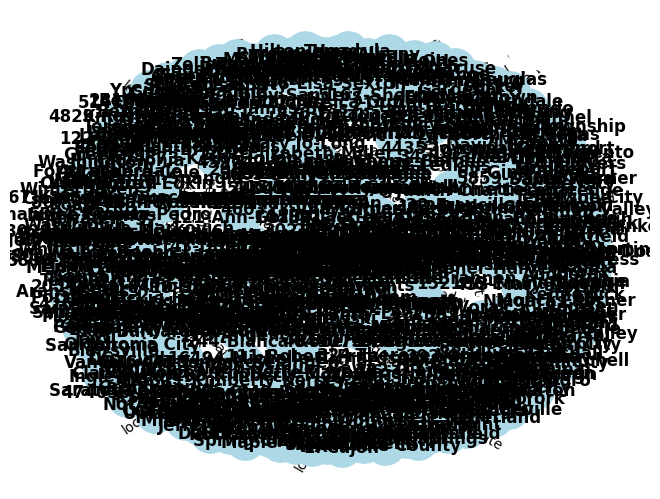

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Filtra il DataFrame per un preciso decennio (ad esempio, 1980-1989)
selected_decade = '1980-1989'
filtered_df = df[df['decade'] == selected_decade]

# Inizializzazione del grafo diretto
G = nx.DiGraph()

# Aggiungi nodi per gli identificatori dei bambini
G.add_nodes_from(filtered_df['identifier'], node_type='child')

# Aggiungi nodi per gli stati e le città presenti nel decennio
states = filtered_df['missingfromstate'].unique()
cities = filtered_df['missingfromcity'].unique()

G.add_nodes_from(states, node_type='state')
G.add_nodes_from(cities, node_type='city')

# Aggiungi archi in base alle relazioni desiderate (puoi modificare questa parte in base alle tue esigenze)
# Ad esempio, puoi collegare i bambini agli stati e alle città in base alla loro ubicazione nel dataset
for _, row in filtered_df.iterrows():
    G.add_edge(row['identifier'], row['missingfromstate'], edge_type='located_in_state')
    G.add_edge(row['identifier'], row['missingfromcity'], edge_type='located_in_city')

# Disegna il grafo
pos = nx.spring_layout(G)  # Puoi cambiare il layout a seconda delle tue esigenze
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=800)
edge_labels = nx.get_edge_attributes(G, 'edge_type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


nx.write_gexf(G, "graphs/grafo_gephi.gexf")